# Load data and import statements

In [0]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%tensorflow_version 2.x

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
# project_path = '/content/drive/My Drive/assignments/' # Path for google colab
project_path = './'

In [5]:
# All imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
# Read data from the csv file
loanData = pd.read_csv(project_path + 'Bank_Personal_Loan_Modelling-1.csv')

In [7]:
loanData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
# Check if the data sanity
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are 14 columns and 5000 rows of data. None of the row is empty.

In [0]:
#Lets analyse the distribution of the various attributes
loanData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [0]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
loanData.groupby(["Personal Loan"]).count()



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


Most of the people have not taken loan. The percentage of people who have taken loan is just 9.60%

# Study the data distribution in each attribute, share your findings

<Figure size 432x216 with 0 Axes>

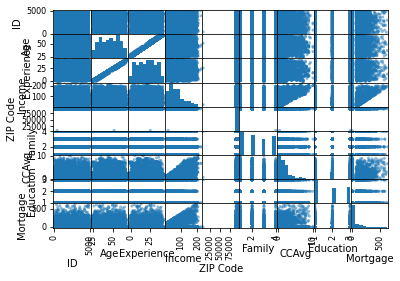

In [0]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension

loanData_attr = loanData.iloc[:,0:9]

fig = plt.figure(figsize=(6,3))
axes = pd.plotting.scatter_matrix(loanData_attr)
fig.show()
# plt.tight_layout()


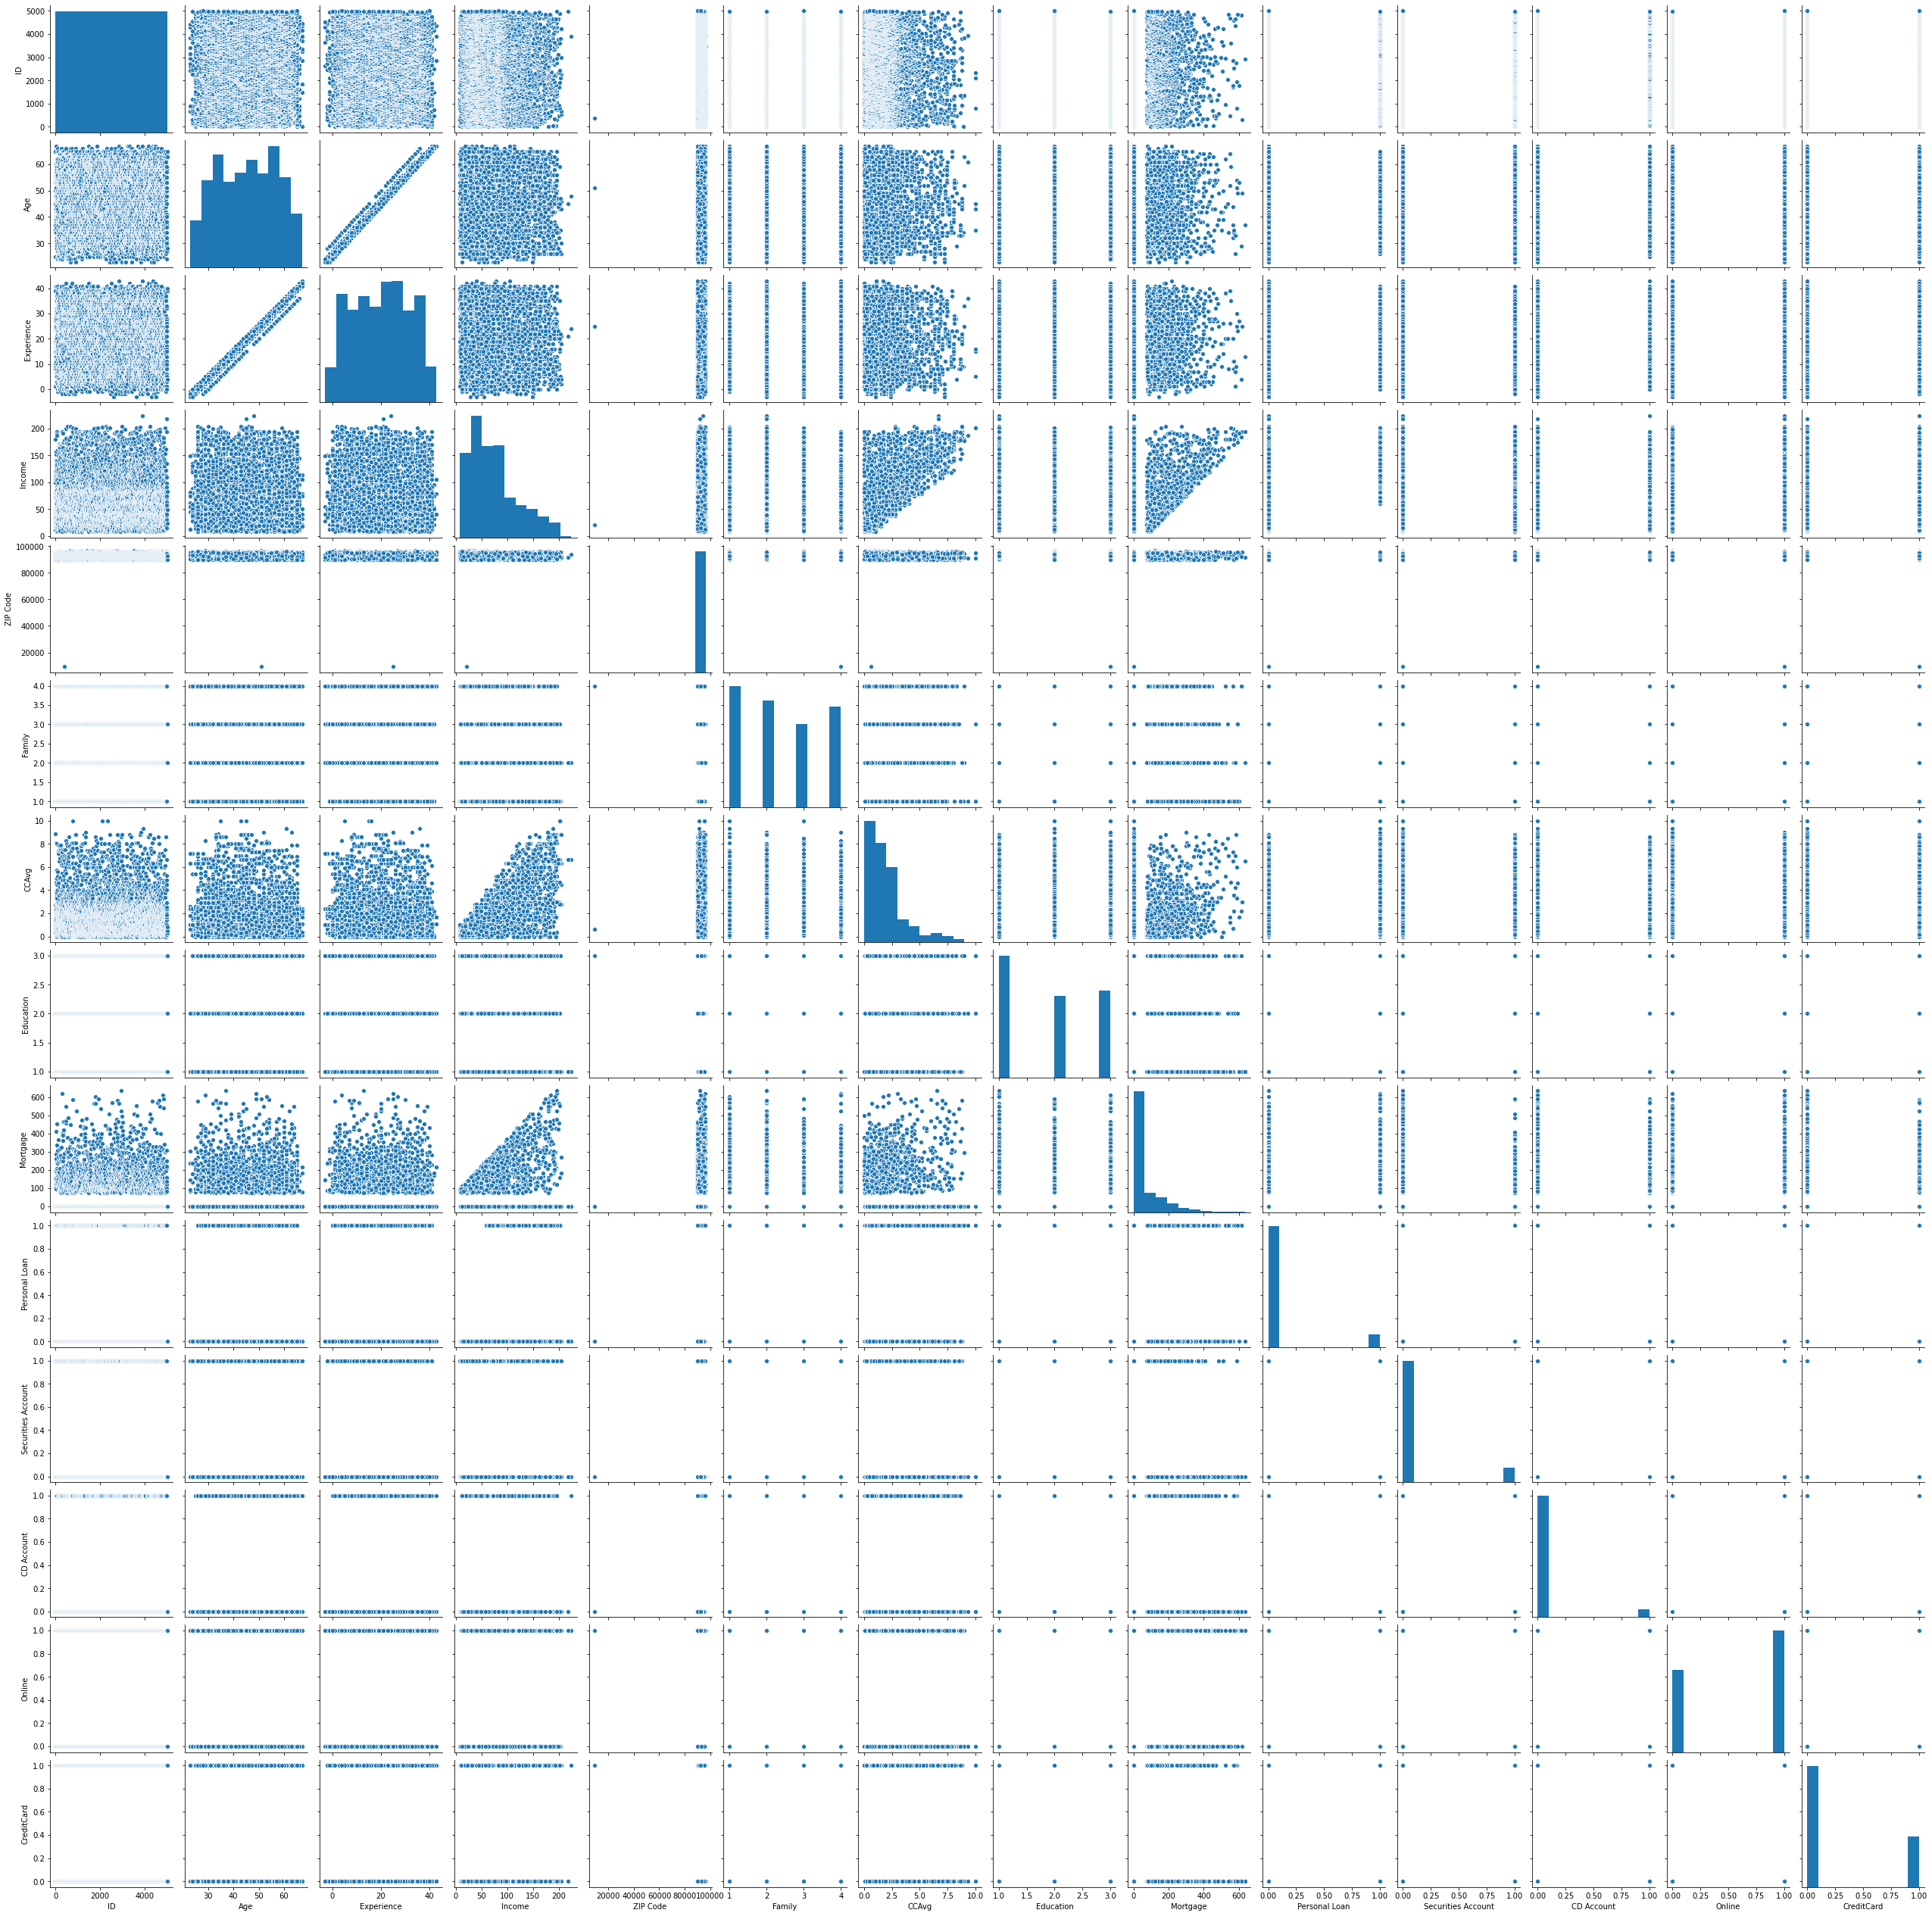

In [0]:
# Pairplot using sns

sns.pairplot(loanData)

From above age and experience seems to have a normal distribution while experience is slightly right skewed and average spend on credit card and motgage is highly right skewed. This would mean the income, spending on credit card and mortage taken have a correlation to certain extent.

# Get the target column distribution. Your comments

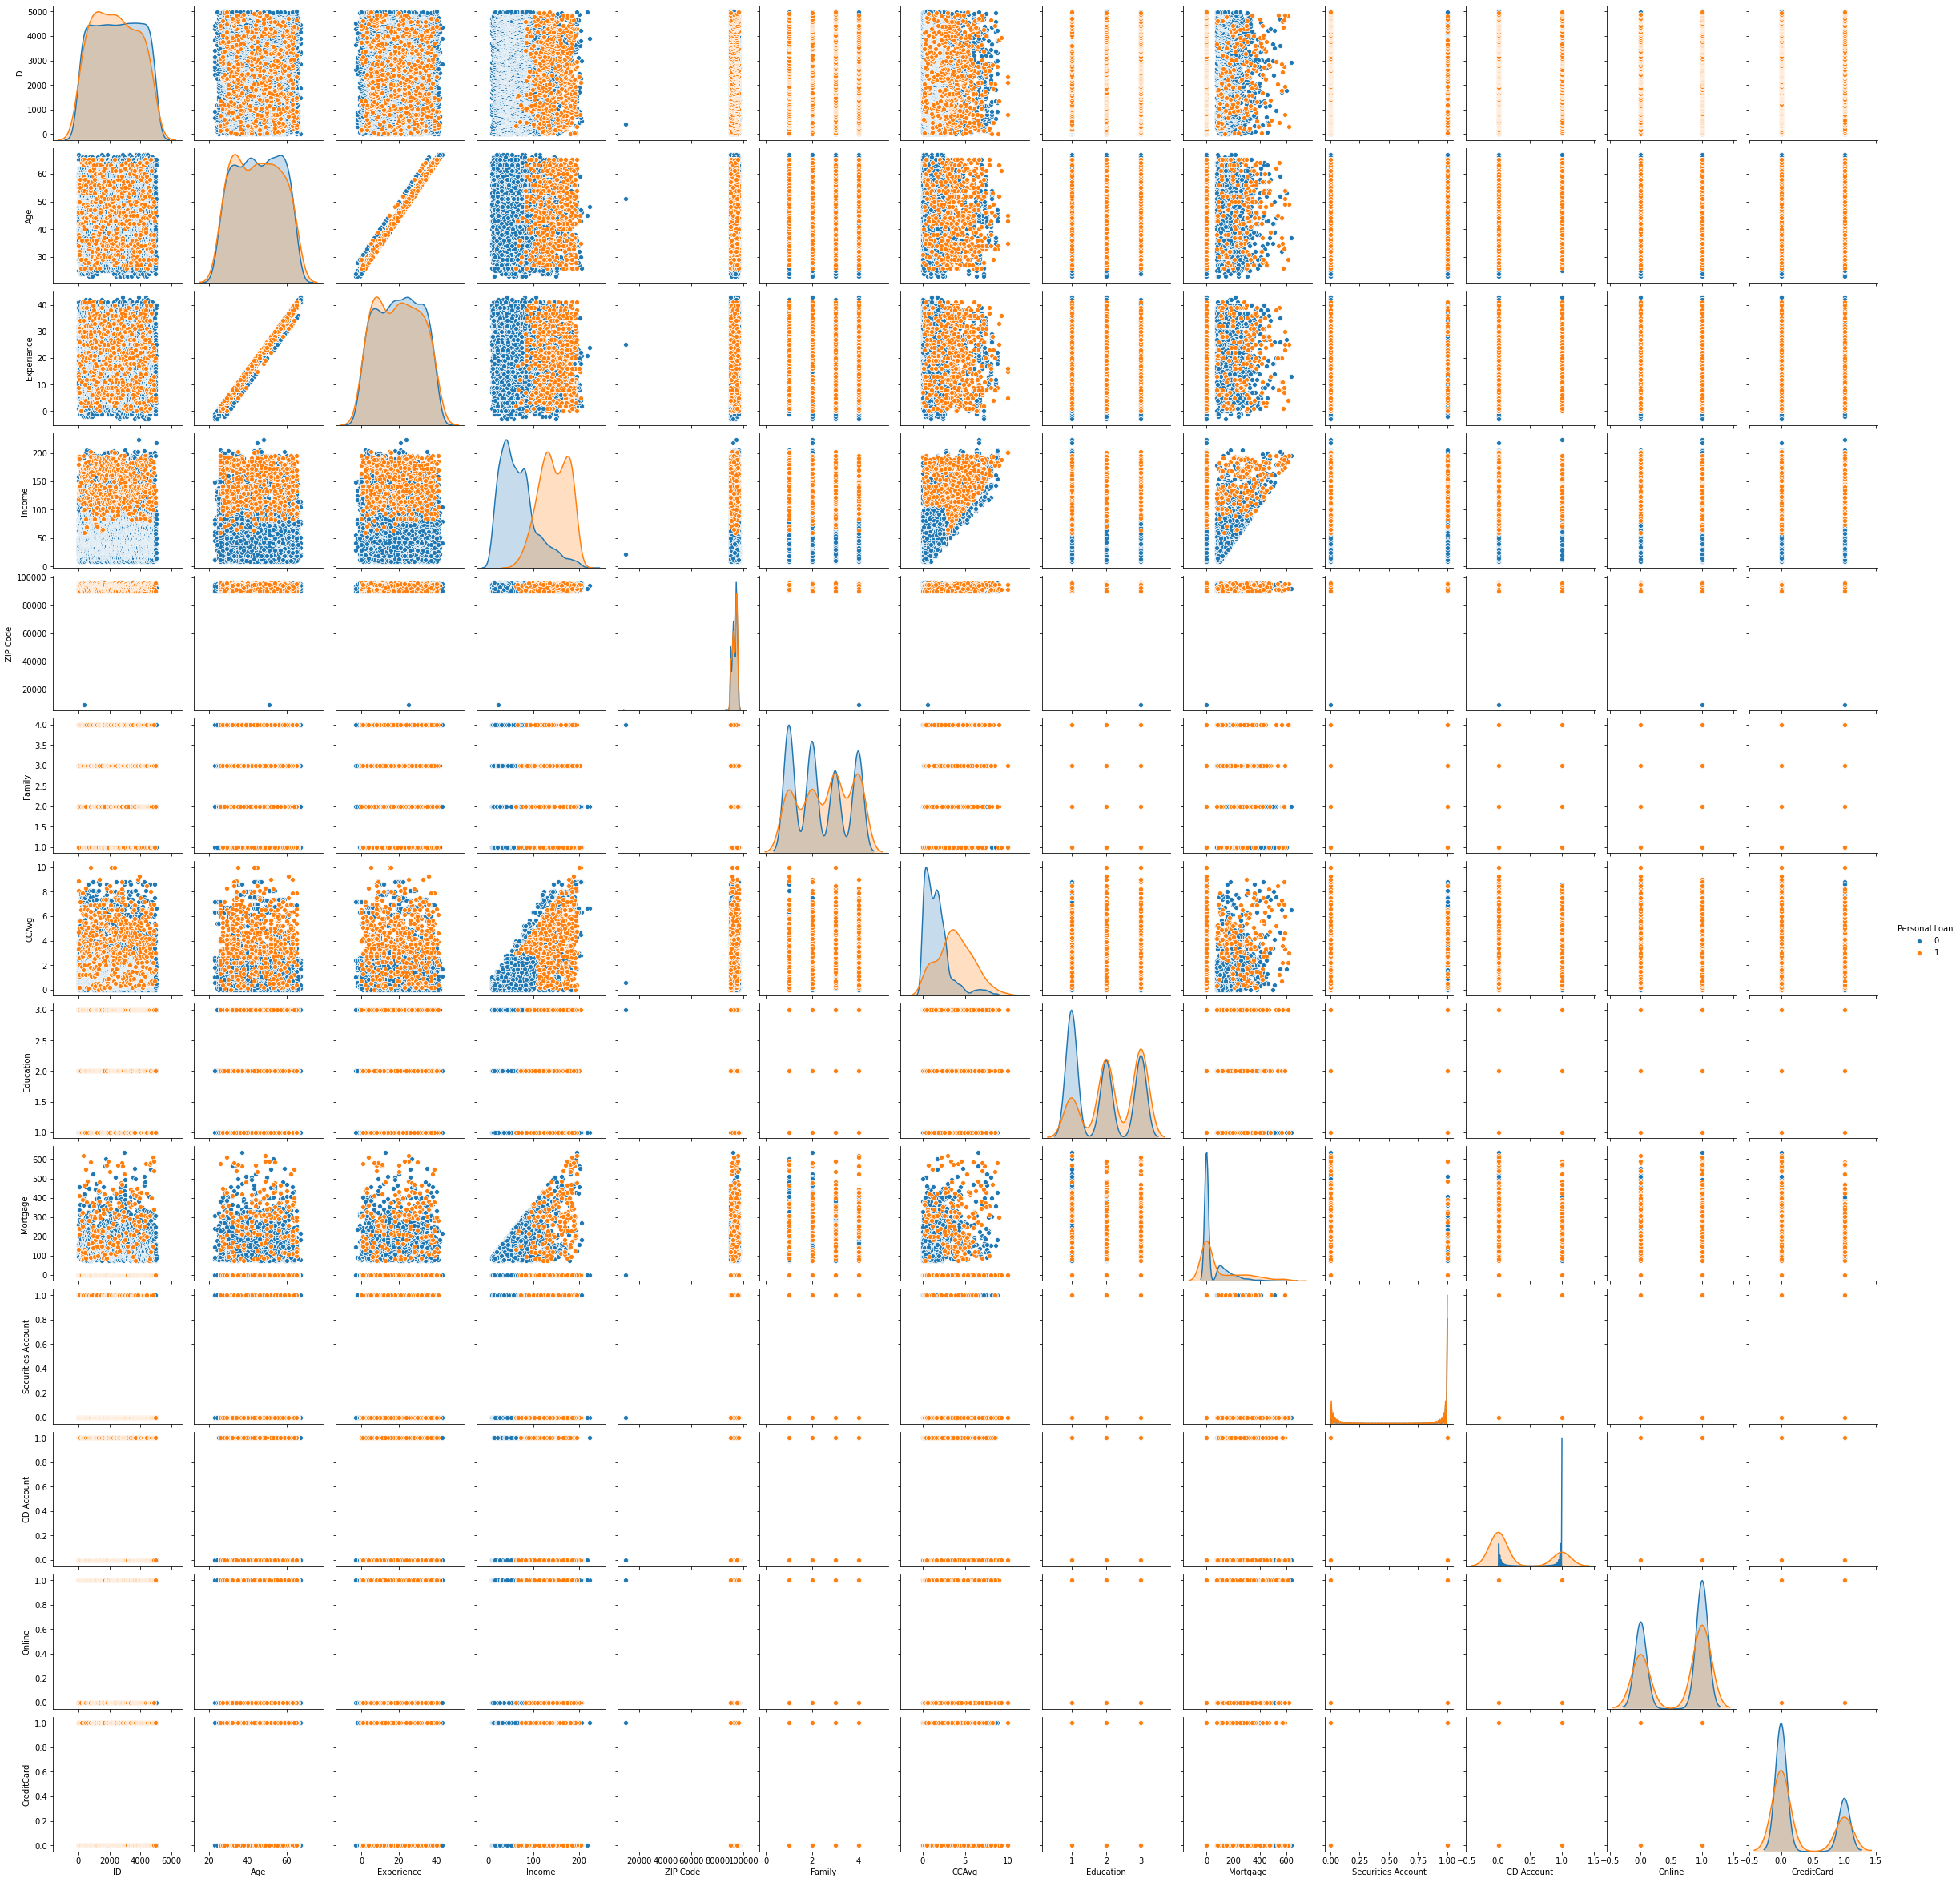

In [0]:
# Plotting the pair plot in relation to the Personal Loan (the target column) 
sns.pairplot(loanData, hue="Personal Loan")

From the plot above in regards to the target column it can be seen that income and average credit card spend are very good features as they beautifully seperated peaks. Mortage is having a highly overlapping curve which means it is not a good feature. Rest all features like age, experiencem, education etc have highly overlapping curve hence will be very bad feature selection.


# Split the data into training and test set in the ratio of 70:30 respectively

In [0]:
X = loanData.drop('Personal Loan', axis=1).values # Select all the columns except the Personal Loan column 
Y = loanData['Personal Loan'].values  # Select the personal loan column 
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

# Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

 ## Using the logistic classification model to predict the likelyhood

In [0]:
logisticModel = LogisticRegression(max_iter=200)
logisticModel.fit(X_train, y_train)
y_predict_logistic = logisticModel.predict(X_test)
logisticModel_score = logisticModel.score(X_test, y_test)


## Using the KNeighbours classification model to predict the likelyhood

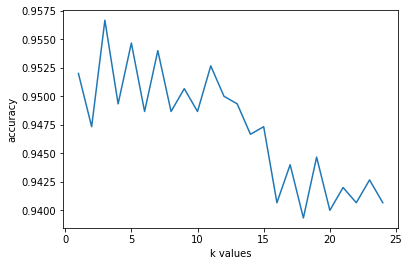

In [0]:
# 
# First lets find the best k value
score_list = []  # we store the values we find in this list.
X_test_scaled = preprocessing.scale(X_test)
X_train_scaled = preprocessing.scale(X_train)
for each in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(X_train_scaled,y_train)
    score_list.append(knn.score(X_test_scaled,y_test))
    
# visualize
plt.plot(range(1,25),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

Looks like the best k value is 3. Building the model with this value

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)  #n_neighbors = k
knn.fit(X_train_scaled,y_train)  # the model is creating
y_predict_knn = knn.predict(X_test_scaled)  # prediction 
knn_score = knn.score(X_test_scaled, y_test)
# print(knn_score)
# print(confusion_matrix(y_test, y_predict_knn))

## Using the Naive Bayes classification model to predict the likelyhood

In [0]:
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
y_predict_nb = nbModel.predict(X_test)
nb_score = nbModel.score(X_test, y_test)
# print(nb_score)
# print(confusion_matrix(y_test, y_predict_nb))

# Print the confusion matrix for all the above models

In [0]:
# Print the score confusion matrix for Logistic model
print('Logistic Model score is', logisticModel_score)
print('Logistic Model classification report is')
print(classification_report(y_test, y_predict_logistic))
print('Logistic Model confusion report is')
print(confusion_matrix(y_test, y_predict_logistic))

Logistic Mode score is 0.934
Logistic Mode classification report is
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1362
           1       0.69      0.51      0.59       138

    accuracy                           0.93      1500
   macro avg       0.82      0.74      0.77      1500
weighted avg       0.93      0.93      0.93      1500

Logistic Mode confusion report is
[[1331   31]
 [  68   70]]


In [0]:
# Print the score confusion matrix for KNN model
print('KNN Model score is', knn_score)
print('KNN Model classification report is')
print(classification_report(y_test, y_predict_knn))
print('KNN Model confusion report is')
print(confusion_matrix(y_test, y_predict_knn))

KNN Mode score is 0.9566666666666667
KNN Mode classification report is
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1362
           1       0.92      0.58      0.71       138

    accuracy                           0.96      1500
   macro avg       0.94      0.79      0.84      1500
weighted avg       0.96      0.96      0.95      1500

KNN Mode confusion report is
[[1355    7]
 [  58   80]]


In [0]:
# Print the score confusion matrix for Naive Bayes model
print('Naive Bayes Model score is', nb_score)
print('KNNaive Bayes Model classification report is')
print(classification_report(y_test, y_predict_nb))
print('Naive Bayes Model confusion report is')
print(confusion_matrix(y_test, y_predict_nb))

Naive Bayes Model score is 0.8786666666666667
KNNaive Bayes Model classification report is
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1362
           1       0.39      0.59      0.47       138

    accuracy                           0.88      1500
   macro avg       0.67      0.75      0.70      1500
weighted avg       0.90      0.88      0.89      1500

Naive Bayes Model confusion report is
[[1237  125]
 [  57   81]]


#  Give your reasoning on which is the best model in this case and why it performs better

The accuracy of the Knn is the best at 96% with Logistic at 93% and Naive Bayes at 88%
The accuracy of KNN is the best by virtue of its powerful classification algorithm. The problem is for classification whether the user in given conditions will take a loan or not. KNN can accurately classify the same. Logistic and Naive Bayes are more of regression model and hence in this case the KNN is the best.